# Analysis of component separation results

In [1]:
import os 
import sys
sys.path.append(os.getcwd()+'/Library/')
from tools import *

## Load data

In [2]:
border_size = 64
sep = np.load('Results/separation_results_JM.npy')[:,border_size:-border_size,border_size:-border_size]
d = sep[0]
s = sep[1]
s_tilde = sep[2]

In [3]:
labels = [r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"]
colors = [color[0],color[1],color[1]]
styles = ['-','-','--']
nature = r'$\rm{I}$' 

## Plot data

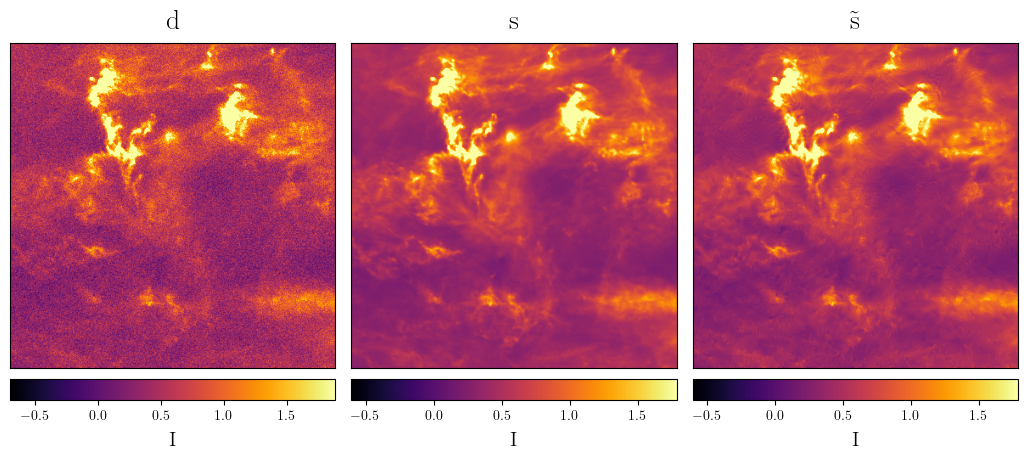

In [4]:
border_size = 64

fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

A = plot_subplot(ax,0,d,labels[0])
B = plot_subplot(ax,1,s,labels[1])
C = plot_subplot(ax,2,s_tilde,labels[2])

set_colorbar(ax,A,0,label=nature)
set_colorbar(ax,B,1,label=nature)
set_colorbar(ax,C,2,label=nature)

plt.subplots_adjust(left=0.08,bottom=0.05,right=0.92,top=0.95,wspace=0.05,hspace=0.15)

## Power spectra

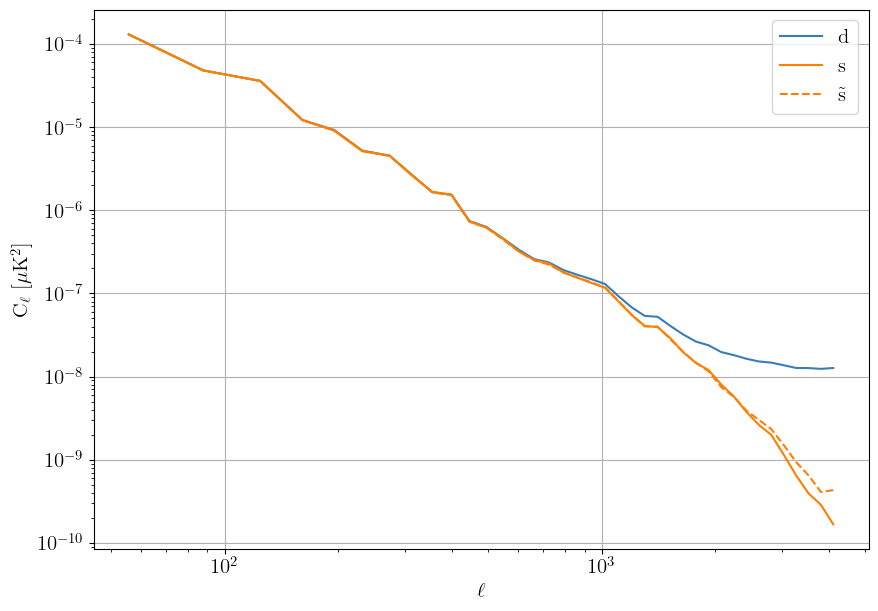

In [5]:
plot_PS(np.array([d,s,s_tilde]),labels,colors=colors,styles=styles,reso = 2.35,axis='l',fontsize=15)

## Histograms

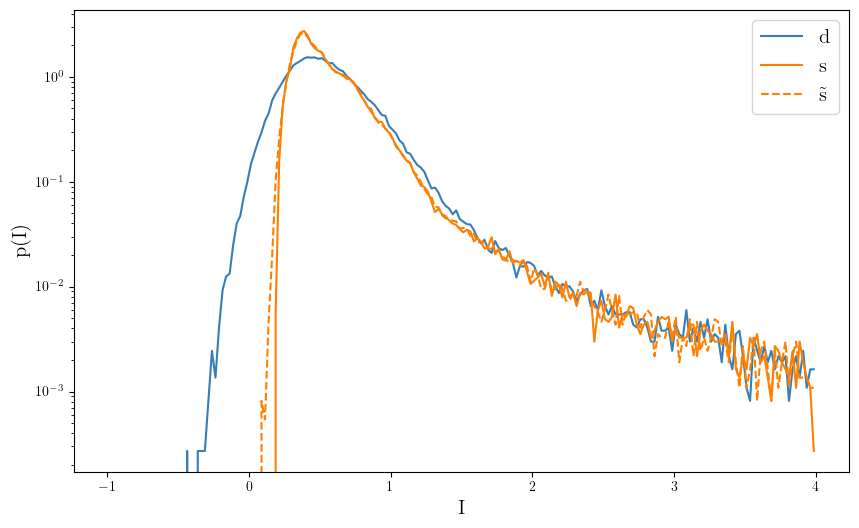

In [6]:
plot_hist(np.array([d,s,s_tilde]),labels=[r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"],colors=[color[0],color[1],color[1]],styles=['-','-','--'],n_bins=200,log=True,value_range=(-1,4),fontsize=15,nature=nature)

## WPH statistics

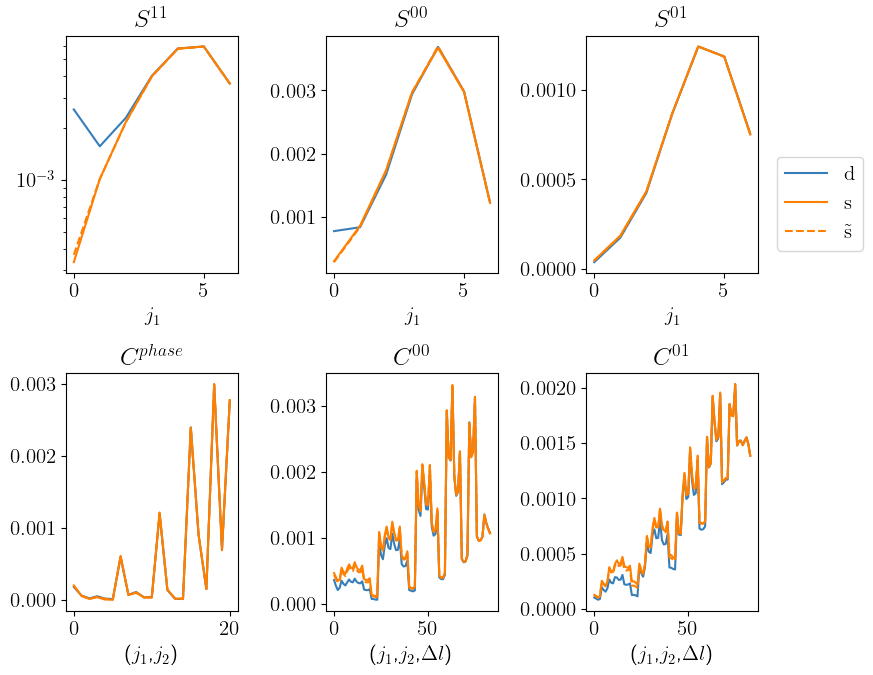

In [7]:
plot_wph(np.array([d,s,s_tilde]),labels=[r"$\rm{d}$",r"$\rm{s}$",r"$\rm{\tilde{s}}$"],colors=[color[0],color[1],color[1]],styles=['-','-','--'],J=7,L=4,dn=0,pbc=False)